In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../credit/input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

UCI_Credit_Card.csv



In [6]:
from sklearn import preprocessing
import random
random.seed(90)
from sklearn.neural_network import MLPClassifier
print('Random',random.random())
import matplotlib as plt
from sklearn.preprocessing import StandardScaler  
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing,cross_validation,svm,neighbors
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


data = pd.read_csv('../credit/input/UCI_Credit_Card.csv')

df = data.copy()
target = 'default.payment.next.month'
print(df.columns)

Random 0.20367044742105156
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


Sex
{2: 18112, 1: 11888}
Education is ordinnal Keep it, but set, others to NA
{2.0: 14030, 1.0: 10585, 3.0: 4917, 'NaN': 468}
{2.0: 14030, 1.0: 10585, 3.0: 4917, 'NaN': 468}
MARRIAGE 0,3=>NA
{1.0: 30000}
{1.0: 30000}
Others are quantitative and presents
                 ID       LIMIT_BAL           SEX     EDUCATION  MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  29532.000000   30000.0   
mean   15000.500000   167484.322667      1.603733      1.808073       1.0   
std     8660.398374   129747.661567      0.489129      0.698643       0.0   
min        1.000000    10000.000000      1.000000      1.000000       1.0   
25%     7500.750000    50000.000000      1.000000      1.000000       1.0   
50%    15000.500000   140000.000000      2.000000      2.000000       1.0   
75%    22500.250000   240000.000000      2.000000      2.000000       1.0   
max    30000.000000  1000000.000000      2.000000      3.000000       1.0   

                AGE         PAY_0         PAY_2     

/home/akash/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/akash/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


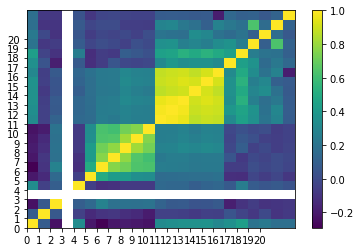

In [14]:
def describe_factor(x):
    ret = dict()
    for lvl in x.unique():
        if pd.isnull(lvl):
            ret["NaN"] = x.isnull().sum()
        else:
           ret[lvl] = np.sum(x==lvl)
    return ret

print('Sex')
print(describe_factor(df['SEX']))
# {1: 11888, 2: 18112}

print('Education is ordinnal Keep it, but set, others to NA')
print(describe_factor(df["EDUCATION"]))
# {0: 14, 1: 10585, 2: 14030, 3: 4917, 4: 123, 5: 280, 6: 51}


df["EDUCATION"] = df["EDUCATION"].map({0: np.NaN, 1:1, 2:2, 3:3, 4:np.NaN, 
    5: np.NaN, 6: np.NaN})
print(describe_factor(df["EDUCATION"]))
# {1.0: 10585, 2.0: 14030, 3.0: 4917, 'NaN': 468}

print('MARRIAGE 0,3=>NA')
print(describe_factor(df["MARRIAGE"]))
# {0: 54, 1: 13659, 2: 15964, 3: 323}

df.MARRIAGE = df.MARRIAGE.map({0:np.NaN, 1:1, 2:0, 3:np.NaN})
print(describe_factor(df.MARRIAGE))
# {0.0: 15964, 1.0: 13659, 'NaN': 377}

print("Others are quantitative and presents")

print(df.describe())
print(df.isnull().sum())
df.ix[df["EDUCATION"].isnull(), "EDUCATION"] = df["EDUCATION"].mean()
df.ix[df["MARRIAGE"].isnull(), "MARRIAGE"] = df["MARRIAGE"].mean()
print(df.isnull().sum().sum())
describe_factor(df[target])
{0: 23364, 1: 6636}

predictors = df.columns.drop(['ID', target])
X = np.asarray(df[predictors])
y = np.asarray(df[target])

data=X[:300,:].transpose()
R = corrcoef(data)
pcolor(R)
colorbar()
yticks(arange(0,21),range(0,22))
xticks(arange(0,21),range(0,22))
show()
X = X
Y =y
model = LogisticRegression()

In [15]:
def run_classification_algorithms(X1, features_list, num_of_feaures):
    row = {}
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0, stratify=y)
    X_train=preprocessing.robust_scale(X_train, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
    X_test=preprocessing.robust_scale(X_test, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
    svm.LinearSVC(C=1.0,random_state=0)
    row['features']=features_list
    row['NumOfFeatures']=num_of_feaures
    clf=svm.LinearSVC(C=1.0,random_state=0)
    row['SVM']=clf.fit(X_train,y_train).score(X_test,y_test)
    clf=DecisionTreeClassifier(random_state=0)
    row['DT'] = clf.fit(X_train,y_train).score(X_test,y_test)
    clf= RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True, n_jobs=1, random_state=1, verbose=0, warm_start=False, class_weight=None)
    row['RF'] = clf.fit(X_train,y_train).score(X_test,y_test)
    clf = KNeighborsClassifier(n_neighbors=7)
    row['KNN']=clf.fit(X_train,y_train).score(X_test,y_test)
    clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
    beta_1=0.9, beta_2=0.999, early_stopping=False,
    epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
    learning_rate_init=0.001, max_iter=300, momentum=0.9,
    nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
    solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
    warm_start=False)
    row['ANN']=clf.fit(X_train,y_train).score(X_test,y_test)
    return row

#select top best features from regression fit then procede on classification
def select_features(if_select):
    selected_array = []
    for i in range(if_select.size):
        if(if_select[i]):
            selected_array.append(i)
    return selected_array

#create df to hold values for the accuracy in 'SVM_SVC', 'Decision Tree', 'Random Forest','KNN Accuracy', 'ANN or MultiLayerPerceptron'
acc_columns = ['NumOfFeatures','SVM', 'DT', 'RF','KNN', 'ANN']
df1 =  pd.DataFrame(columns=['features'], dtype=str)
df2 =  pd.DataFrame(columns=acc_columns, dtype=float)
results = pd.concat([df1, df2], axis=1)

for i in range(len(predictors)):
    rfe = RFE(model, i+1)
    fit = rfe.fit(X, Y)
    selected_features = select_features(fit.support_)
    features_list = [predictors[i] for i in selected_features]
    print("Num Features:",fit.n_features_)
    print("Selected Features:",features_list)
    print("Feature Ranking: ",fit.ranking_)
    X1=pd.DataFrame(X)
    X1 = X1[selected_features]
    results=results.append(run_classification_algorithms(X1, features_list,fit.n_features_), ignore_index=True)

Num Features: 1
Selected Features: ['PAY_0']
Feature Ranking:  [19  4  7  2  9  1  5  3  8  6 10 14 13 21 23 18 22 11 12 16 15 17 20]
Num Features: 2
Selected Features: ['MARRIAGE', 'PAY_0']
Feature Ranking:  [18  3  6  1  8  1  4  2  7  5  9 13 12 20 22 17 21 10 11 15 14 16 19]
Num Features: 3
Selected Features: ['MARRIAGE', 'PAY_0', 'PAY_3']
Feature Ranking:  [17  2  5  1  7  1  3  1  6  4  8 12 11 19 21 16 20  9 10 14 13 15 18]
Num Features: 4
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_3']
Feature Ranking:  [16  1  4  1  6  1  2  1  5  3  7 11 10 18 20 15 19  8  9 13 12 14 17]
Num Features: 5
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3']
Feature Ranking:  [15  1  3  1  5  1  1  1  4  2  6 10  9 17 19 14 18  7  8 12 11 13 16]
Num Features: 6
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_5']
Feature Ranking:  [14  1  2  1  4  1  1  1  3  1  5  9  8 16 18 13 17  6  7 11 10 12 15]
Num Features: 7
Selected Features: ['SEX', 'EDUCATIO

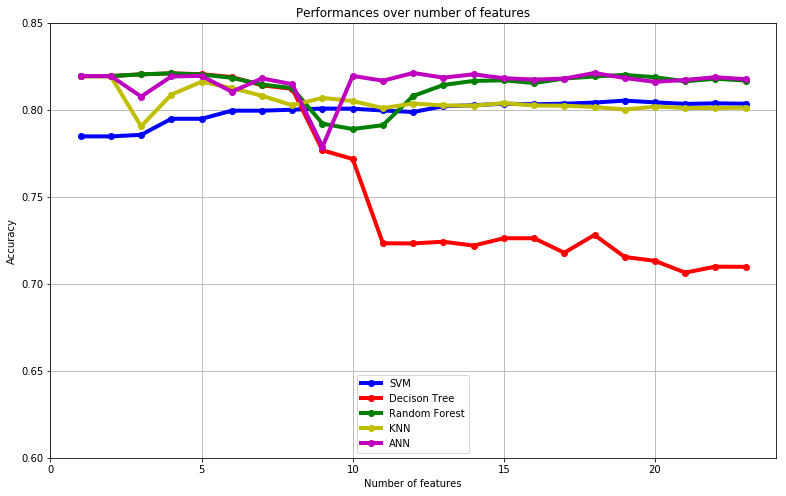

In [16]:
#display performances over all sets of the best features
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 13, 8      
plt.plot(results['NumOfFeatures'],results['SVM'],'bo-', linewidth=4, label='SVM')
plt.plot(results['NumOfFeatures'],results['DT'],'ro-', linewidth=4, label='Decison Tree')
plt.plot(results['NumOfFeatures'],results['RF'],'go-', linewidth=4, label='Random Forest')
plt.plot(results['NumOfFeatures'],results['KNN'],'yo-', linewidth=4, label='KNN')
plt.plot(results['NumOfFeatures'],results['ANN'],'mo-', linewidth=4, label='ANN')

plt.title('Performances over number of features')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.axis([0, len(predictors)+1, 0.6, 0.85])
plt.legend(loc='lower center')
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.tight_layout
plt.show()